# <font color = yellow> Business Analytics </font>
# Task :5 (Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ )
# By SRIPARNA BHATTACHARJEE

## Problem Statement : As a business manager, try to find out the weak areas where you can work to make more profit. ##

In [60]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
# reading the data 
data = pd.read_csv(r"C:\Users\sripa\Downloads\SampleSuperstore.csv")
data.head(5)



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [71]:
data.shape

(9994, 13)

### Eliminating any missing values and duplicate values if any ###

In [72]:
# look for missing values
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [73]:
# checking for duplicates
data.duplicated().sum()

17

In [74]:
# droping duplicates
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


###  Explore the information ###


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [76]:
# number of unique elements in the object
data.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### For exploratory data analysis we do not need to consider Postal Code .And as there is only one country in our data set we can delete those columns. ###

In [77]:
del data['Postal Code']
del data['Country']
print(data)

           Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category     Sales  Quantity  Discount    Profit  
0           Furniture    Bookcases  261.9600         2      0.00   41.


# Visualising the data to have better understanding 

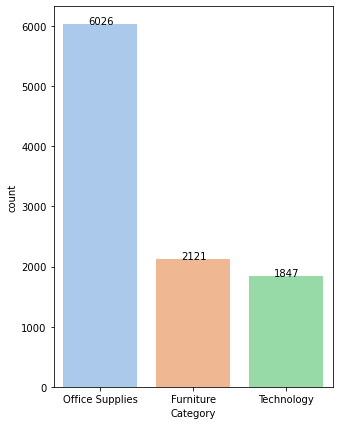

In [78]:
# Category vise total counts 
data1=data['Category'].value_counts()

plt.figure(figsize=(5,7))
ax = sns.countplot(x="Category" , order = data['Category'].value_counts().index,palette="pastel", data = data)

for p, label in zip(ax.patches, data1):
    ax.annotate(label, (p.get_x()+p.get_width()/3, p.get_height()/1.0001))


Text(0, 0.5, 'Quantity')

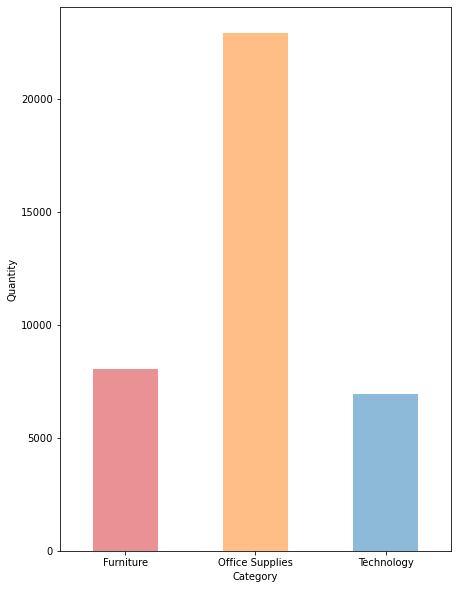

In [107]:
# How much is sold from each Category
df= data.groupby("Category")["Quantity"].sum()
ax = df.plot(kind='bar',alpha=0.5, rot=0,color=['C3', 'C1', 'C10'],figsize=(7,10))
ax.set_ylabel('Quantity')



### Clearly a large amount shipped is Office Supplies. 

# Category vise Profts and Sales

In [80]:
category = data.groupby(by='Category').agg('sum').reset_index()
category

,Category,Sales,Quantity,Discount,Profit
0,Furniture,741999.7953,8028,368.89,18451.2728
1,Office Supplies,719047.0320,22906,947.80,122490.8008
2,Technology,836154.0330,6939,244.40,145454.9481


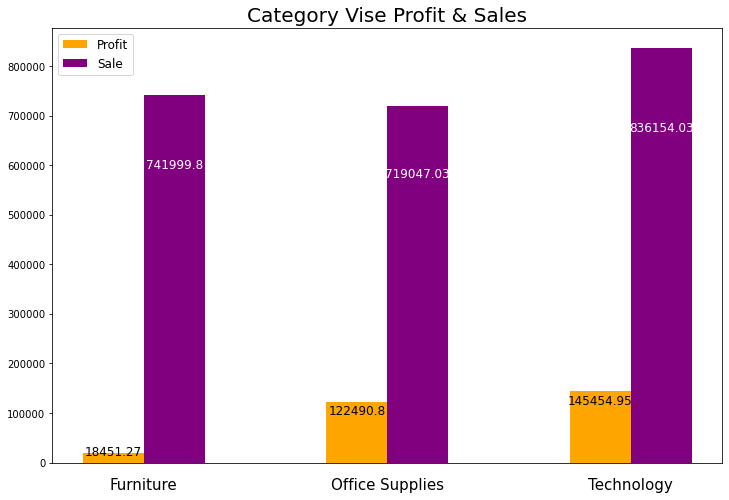

In [81]:
category = data.groupby(by='Category').agg('sum').reset_index()
category

profit = category['Profit']
sales = category['Sales']
x = np.array(range(0,10,4))

fig1 = plt.figure(figsize=(12,8))
plt.title("Category Vise Profit & Sales",fontsize=20)
bars = plt.bar(x-0.5,profit,width=1,color='orange',label='Profit')
bars2 = plt.bar(x+0.5,category['Sales'],color= 'purple',width=1,label='Sale')

ax = plt.gca().axes
ax.get_yaxis().set_visible(True)
ax.get_xaxis().set_visible(False)


for bar,bar2,profit,sale,label in zip(bars,bars2,profit,category['Sales'],category['Category'].unique()):
    
    plt.gca().axes.text(bar.get_x()+bar.get_width()/2,profit*0.8,str(round(profit,2)),horizontalalignment='center',color='black',fontsize=12)
    plt.gca().axes.text(bar2.get_x()+bar.get_width()/2,sale*0.8,str(round(sale,2)),horizontalalignment='center',color='white',fontsize=12)
    plt.gca().axes.text(bar2.get_x(),-55000,label,horizontalalignment='center',color='black',fontsize=15)
plt.legend(fontsize=12)
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

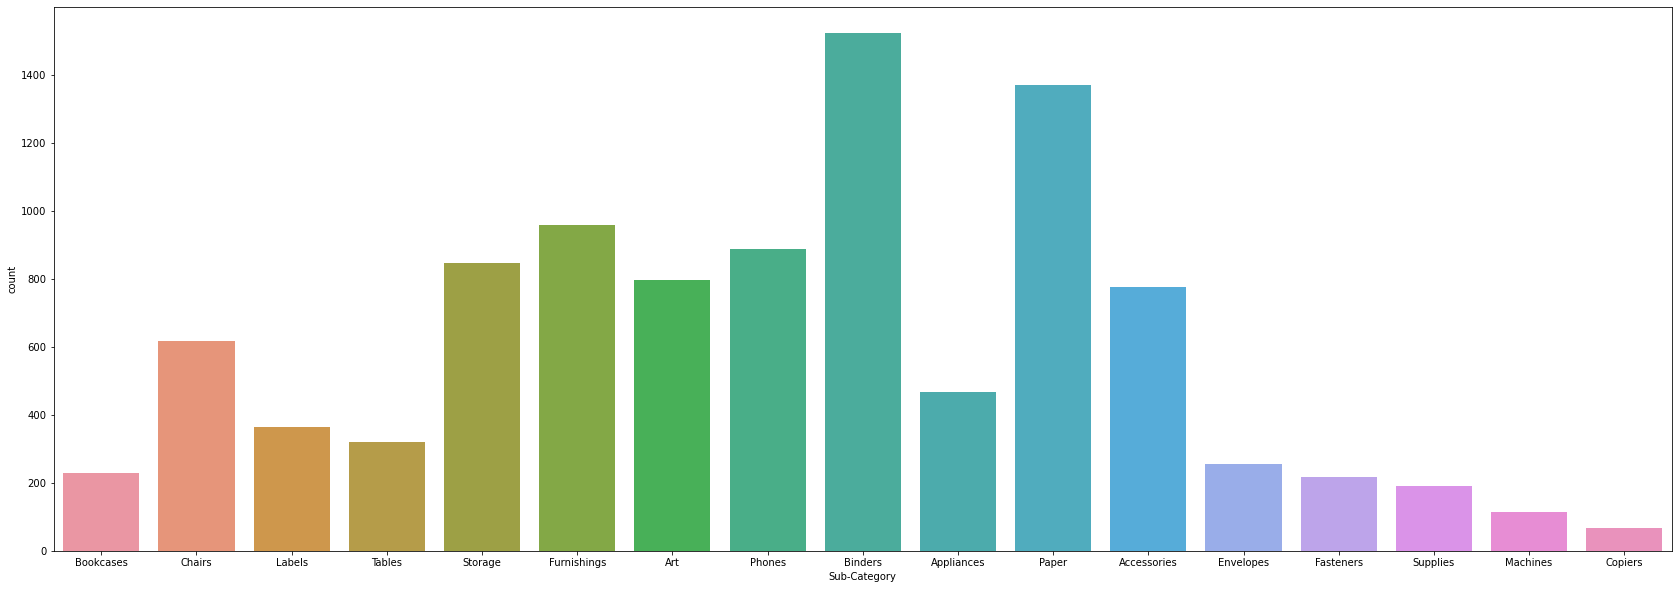

In [82]:
# Items which are sold more based on sub categories
plt.figure(figsize=(29,10))# enlarges the fig size to avoid overlaping

sns.countplot(x = "Sub-Category", data = data)

Binders has the most sales when we consider sub categories. And Copiers has the least.

# Sub-Category vise sales and profit

Sub-category with min profit : Tables
Sub-category with min sales : Fasteners
Sub-category with max profit : Copiers
Sub-category with max sales : Phones


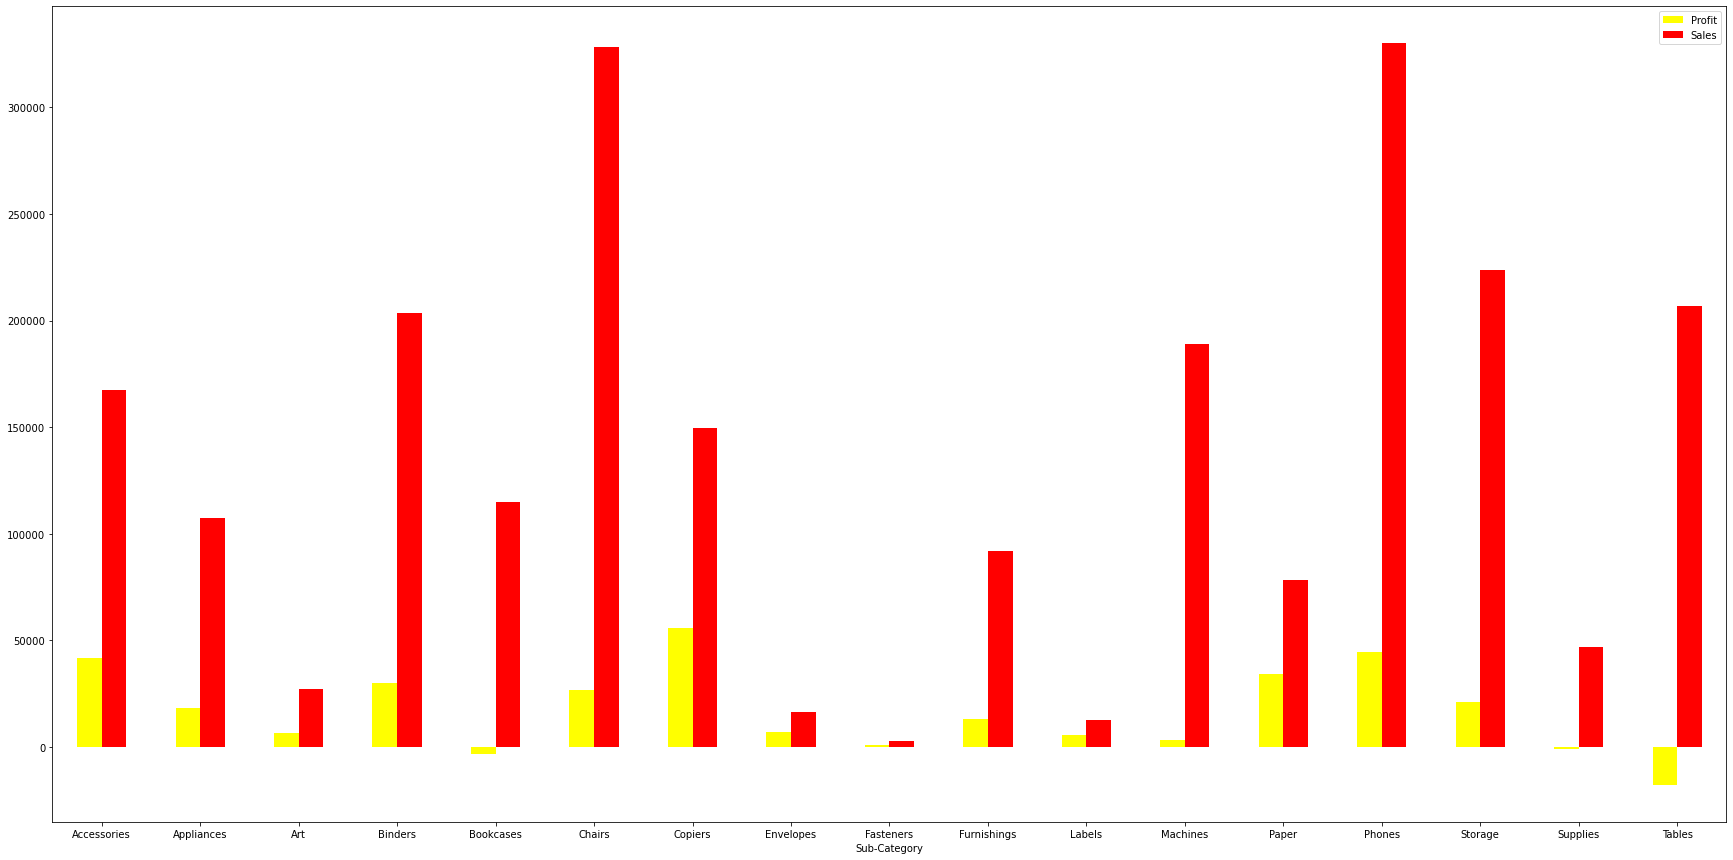

In [83]:
df = data.groupby('Sub-Category')[['Profit','Sales']].agg('sum')
df.plot(kind = "bar",rot = 0, figsize=(30,15),color = ["yellow","red"] )
index1 = df.idxmin() #gives us the column name which corresponds to the minimum level of profit and sales
print("Sub-category with min profit :", index1[0])
print("Sub-category with min sales :", index1[1])
index2 = df.idxmax()
minimum = df.max()
print("Sub-category with max profit :", index2[0])
print("Sub-category with max sales :", index2[1])

#### Sub-category with min profit : Tables
#### Sub-category with min sales : Fasteners
#### Sub-category with max profit : Copiers
#### Sub-category with max sales : Phones


### Clearly we can observe that none but only Tables are generating negative profit that is loss. Although the sales are comparatively high.

<AxesSubplot:xlabel='Region', ylabel='count'>

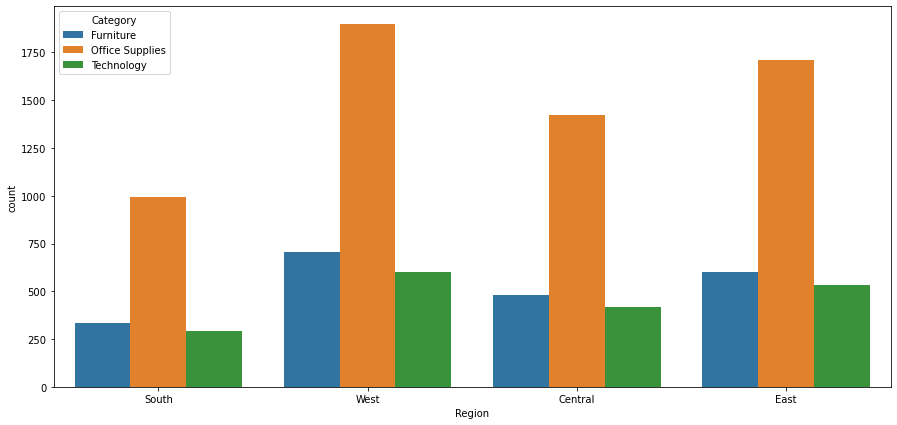

In [99]:
# let us consider region wise how much is sold
plt.figure(figsize=(15,7))
sns.countplot(x = "Region" , hue = "Category" , data = data)

# Region vise sales and Profit.

<AxesSubplot:xlabel='Region'>

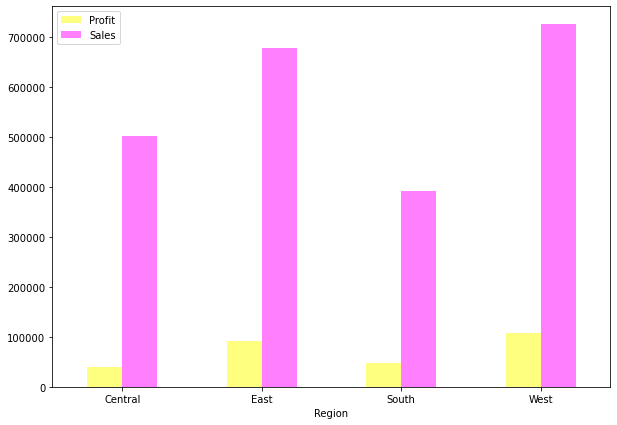

In [85]:
#Calculate region wise profit and sales
df1 = data.groupby("Region")[["Profit","Sales"]].agg("sum")
df1.plot(kind="bar",rot=0,color=['yellow','magenta'],figsize=(10,7), alpha=0.5)

## Sales and profit is highest in Region West. And lowest in South region.

# State vise profits and sales

Profit is maximum in  California
Maximum Profit  76381.38710000017
Loss is maximum  Texas
Maximum Loss  -25729.3563


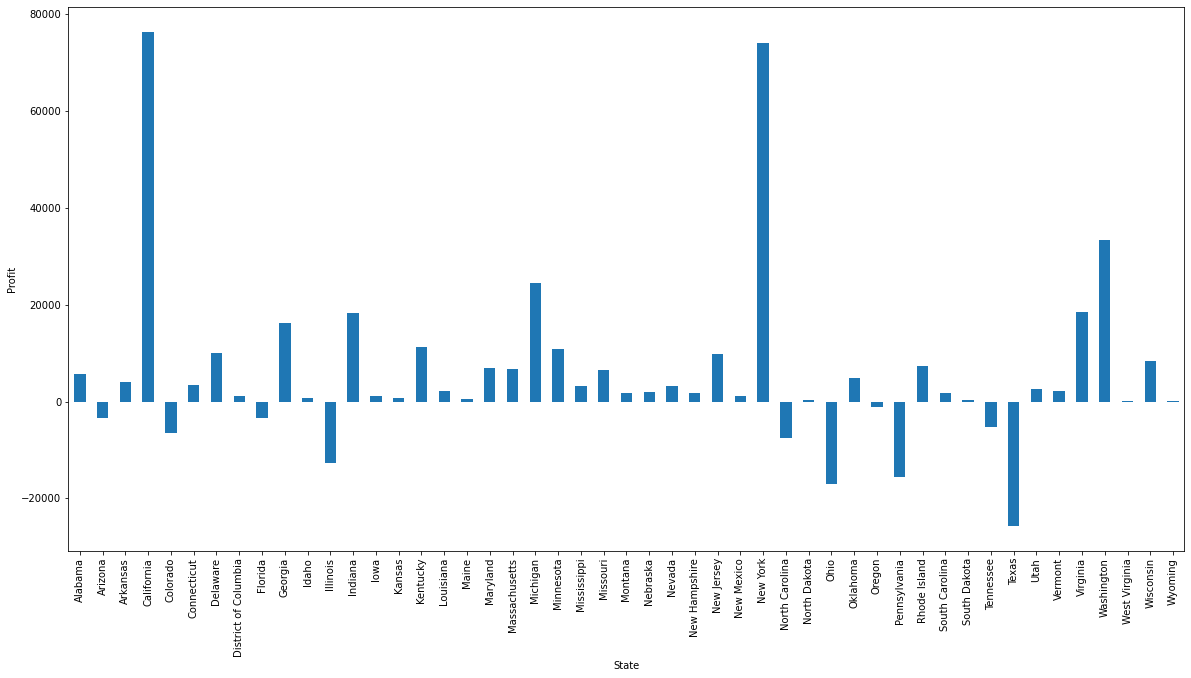

In [86]:
# state vise profit and sales
df2 = data.groupby("State")["Profit"].agg("sum")
df2.plot(kind="bar",figsize=(20,10))
plt.ylabel("Profit")

index1 = df2.idxmax()
max = df2.max()
index2 = df2.idxmin()
min = df2.min()

print("Profit is maximum in ", index1)
print("Maximum Profit ", max)
print("Loss is maximum ", index2)
print("Maximum Loss ", min)


Text(0.5, 0, 'State')

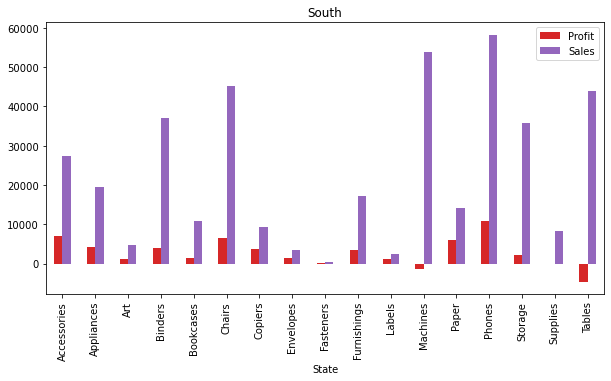

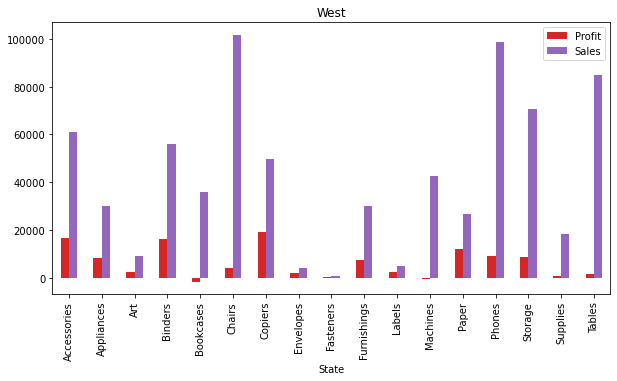

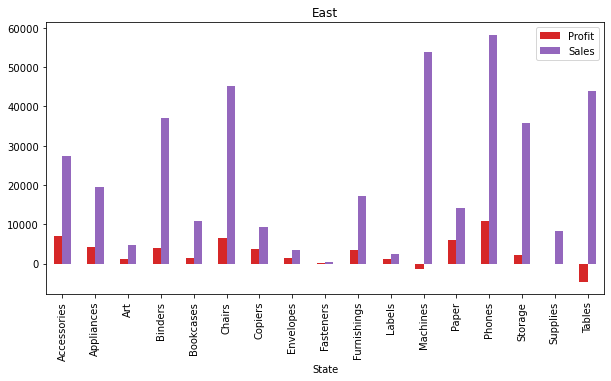

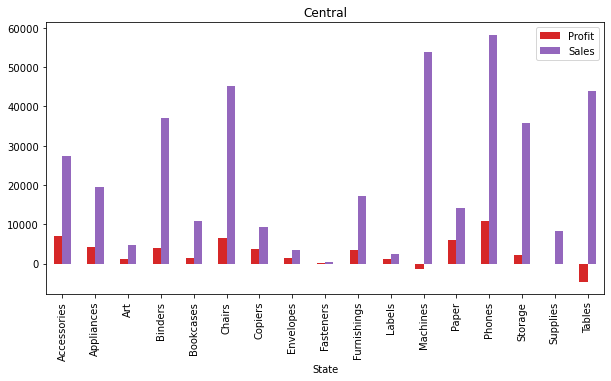

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\sripa\Downloads\SampleSuperstore.csv")
d = data[data["Region"]== "South"]
ax=d.groupby("Sub-Category")[["Profit","Sales"]].sum()
ax.plot(kind="bar", figsize = (10,5), color=["C3","C4"])
plt.title("South")
plt.xlabel("State")

d1 = data[data["Region"]== "West"]
ax1=d1.groupby("Sub-Category")[["Profit","Sales"]].sum()
ax1.plot(kind="bar", figsize = (10,5),color=["C3","C4"])
plt.title("West")
plt.xlabel("State")

d2 = data[data["Region"]== "East"]
ax2=d.groupby("Sub-Category")[["Profit","Sales"]].sum()
ax2.plot(kind="bar", figsize = (10,5),color=["C3","C4"])
plt.title("East")
plt.xlabel("State")


d3 = data[data["Region"]== "Central"]
ax3 = d.groupby("Sub-Category")[["Profit","Sales"]].sum()
ax3.plot(kind="bar", figsize = (10,5),color=["C3","C4"])
plt.title("Central")
plt.xlabel("State")


Maximum profit yeilding city : New York City
Profit : 62036.98369999999
Minimum profit yeilding city : Philadelphia
Loss : -13837.767400000012


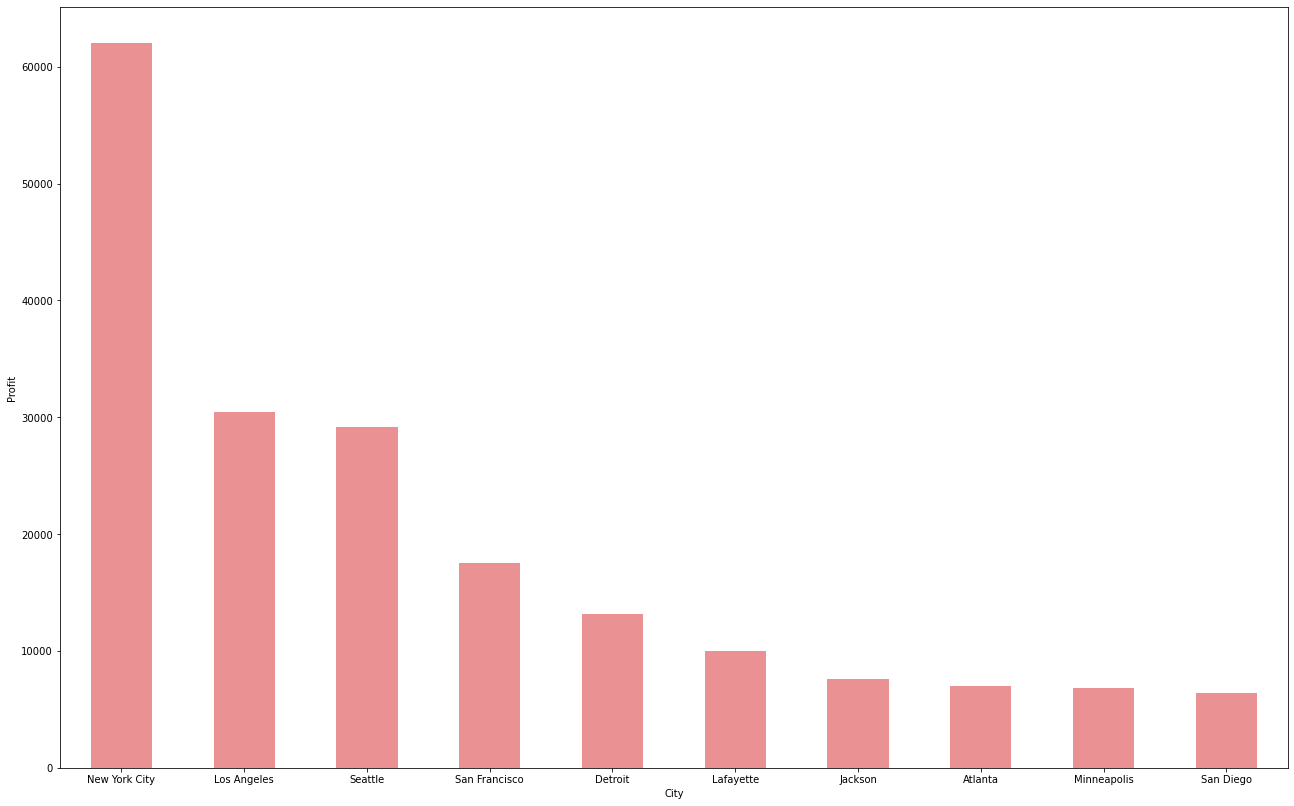

In [88]:
df3 = data.groupby('City')['Profit'].sum()
ax = df3.sort_values(ascending=False)[:10].plot(kind='bar',alpha=0.5, rot=0,figsize=(22,14),color="C3")
ax.set_ylabel('Profit')

maximum = df3.max() #gives us the minimum value across column that is axis = 1 
Index1 = df3.idxmax()

minimum = df3.min() #gives us the minimum value across column that is axis = 1 
Index2 = df3.idxmin() # column name which corresponds to the minimum level of profit and sales
print("Maximum profit yeilding city :",Index1)
print("Profit :",maximum)
print("Minimum profit yeilding city :",Index2)
print("Loss :" ,minimum)

## The above plot shows us the profit made by the shop in top 10 cities.
#### Maximum profit yeilding city : New York City
#### Profit : 62036.98369999999
#### Minimum profit yeilding city : Philadelphia
#### Loss : -13837.767400000012

# How much is sold from each segment

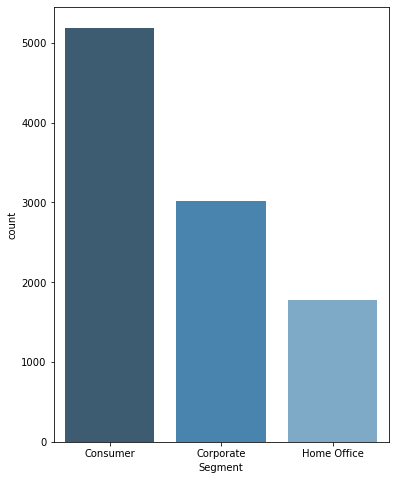

In [89]:
plt.figure(figsize=(6,8))
ax1=sns.countplot(x="Segment", data=data, palette = "Blues_d")


### Clearly we can see that the shipment is largest from the Consumer Segment and lowest from the Home Office segment.

# Profit in each Segment

<AxesSubplot:xlabel='Segment'>

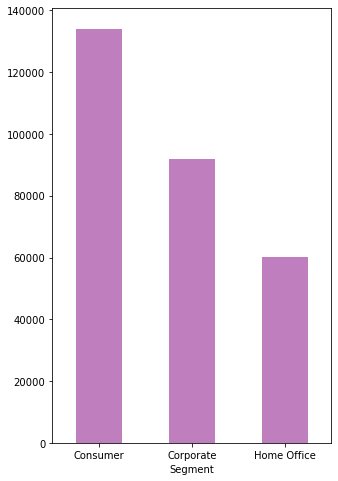

In [90]:
df4= data.groupby("Segment")["Profit"].sum()
df4.plot(kind="bar", rot=0, color="purple",figsize=(5,8),alpha=0.5)


### Clearly Profit is higest in the Consumer segment than the other two segments which complements what we get from the above count plot.

# Now we want to see how profit differs with Shipment mode.

Text(0, 0.5, 'Profit')

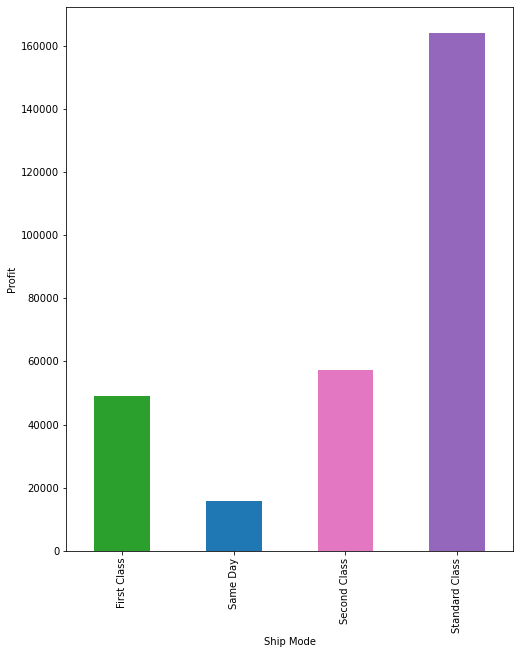

In [91]:
df5= data.groupby("Ship Mode")["Profit"].sum()
df5.plot(kind="bar",color=['C2','C0','C6','C4'],figsize=(8,10))
plt.ylabel("Profit")

### Clearly from the diagram we can say that Standard Class has maximum profit . This is because the quality of shipment is good.
### Notice that despite the delivery is quick, the same day shipment has the lowest profit . That means the quality of the shipment must be poor. So we should improve the shipment quality.

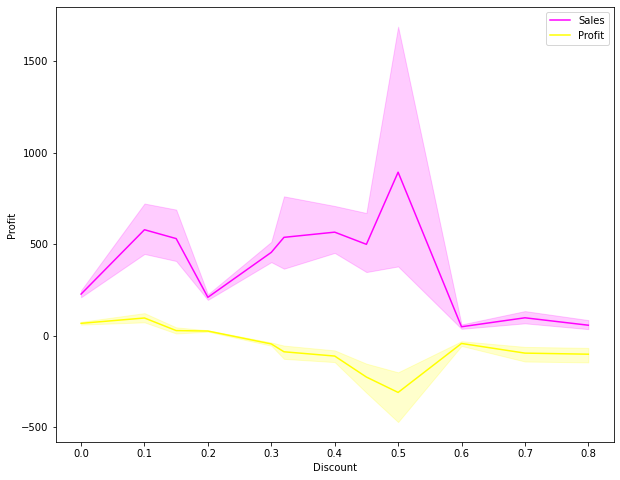

In [121]:
plt.figure(figsize=(10,8))

sns.lineplot("Discount","Sales", color="magenta", label="Sales", data = data)
sns.lineplot("Discount","Profit", color="Yellow", label = "Profit", data = data)
plt.legend()

#### Clearly we see that as discount rises sales first rise then falls then rises to a maximum level then gradually falls then reaches a stable point. Profits are falling over all and they actually incure loss.


In [92]:
### summary statistics of our data ###
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Examine the correlation between the variables ###

In [93]:
# calculate the correlation
Correlation = data.corr()
Correlation


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### <font color = green > Observations </font> : ###
####  1. Sales has a high positive correlation with profits which is aproximately 0.5 .So we can say if our sales rises our profit also rises.<br>
#### 2. Discount is inversely related to sales and profit.<br>
#### 3. Quantity is positively related to sales.<br>

<AxesSubplot:>

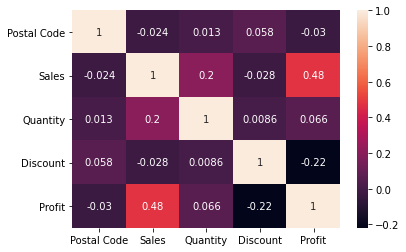

In [94]:
# plot the hit map
sns.heatmap(Correlation,annot=True)

<Figure size 1440x1080 with 0 Axes>

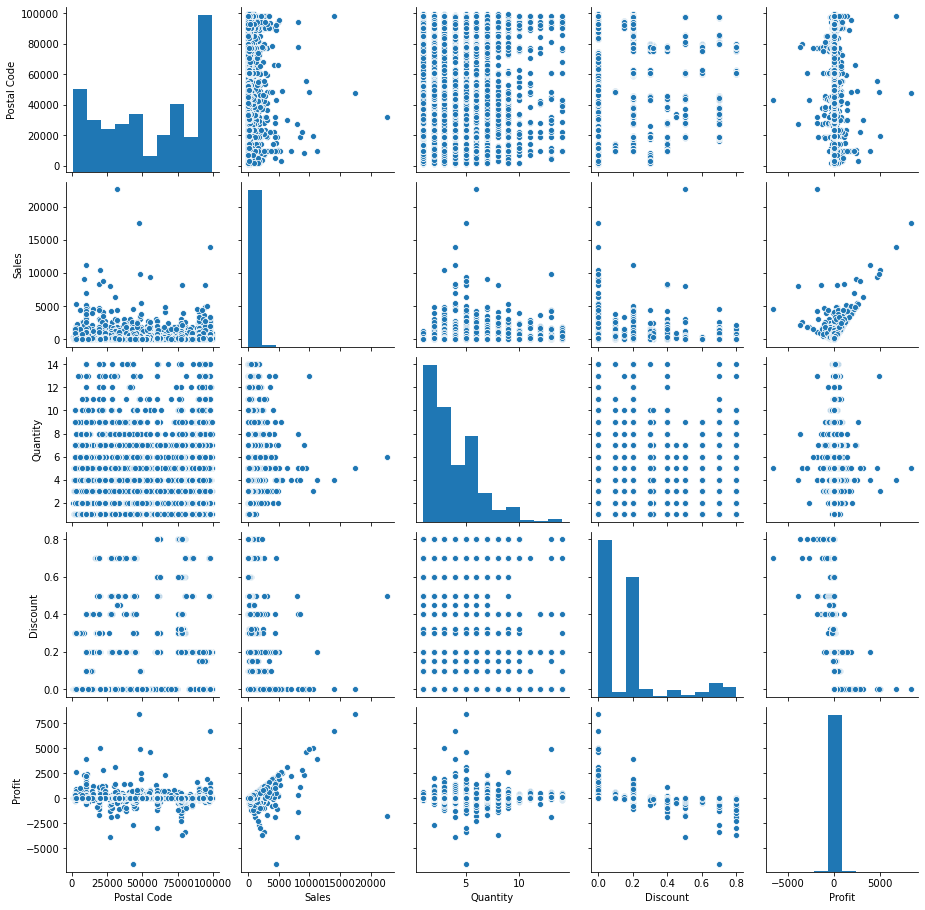

In [95]:
plt.figure(figsize=(20,15))
sns.pairplot(data=data)

### Notice that that the daigonal shows us the marginal distribution. Clearly from the histograms we can see that our sample is not normally distributed.The scatter plot shows us the joint distribution.

# OBSEVATIONS :

#### 1. The quantity bought is more of Office Supplies Category.If we look at the total sales profits from furniture is comparatively low . It should be looked into. The Technology products are the most profited category products.
#### 2. We also noticed that Tables are generating loss while the sales are high. The quality of the tables must be low. So it its to be improved.Sales in that sub-category should be cut for now and focus should be on quality improvement. And Copiers generate maximum profit. 
#### 3. Sales are very low in South . Profit generating from that region is also low. We need to focus on south region.
#### 4. State vise the shop earns a maximum profit from California followed by New York.And highest loss from Texas. Those states which are facing loss must be given special attention.
#### 5. The shop faces a maximum of loss in the city Philadelphia . 
#### 6. We also notice that in the home office and corporate segment profits are low. Sales in these segments should be monitored.
#### 7. The products that are shipped in Standard Class has profited the most. Despite of quick delivery the shipment mode Same Day has the lowest profit . So the quality of shipment needs to be improved. 
#### 8. Profit and Discount show negative relationship. This should be kept in mind before taking any other decision related to business.